<h1><center> Income Prediction Case Study </center></h1>
<h2><center> Author: Kushal Kapadia </center></h2>




I'm very excited about this Case Study! Let's get started!

In this notebook, I have tried to explain everything in as much detail as I could. Basically, I have divided the whole case study into different sub-parts. They are:

1) Business Problem Understanding

2) Hypothesis generation

3) Reading the data

4) Understanding the data (Exploratory Data Analysis)

        - Univariate Analysis
        
        - Bivariate Analysis
        
5) Missing Values and Outliers treatment

6) Feature Engineering

7) Evaluation metric for this Classification Problem

8) One-hot encoding

9) Modeling and Evaluation
        
        - Logistic Regression
        
        - Random Forest
        
        - XGBoost


# Business Problem Understanding

Here, we are dealing with a <b> Binary Classification problem </b> at hand wherein the main objective is to predict whether an individual's income is >\\$50K or <=\\$50K. So, the reponse variable <b>Income</b> has two categories here -- 'Yes' if the salary is >\\$50K and 'No' if the salary is <=\\$50K.

A mixture of both numerical as well as categorical variables have been provided in the dataset. I will try to explore data by doing both <b>univariate analysis</b> as well as <b>bivariate analysis</b> to understand the behavior of predictor variables with each other and with the response variable respectively.  


# Hypothesis Generation

Hypothesis generation is the process of listing out the possible assumptions/factors that can affect the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors I can think of which might affect the target variable:

• As we have just two categories for the target variable i.e. <=50K and >50K, we can expect to see skewed distribution form the
  the fact the people earning >50K will be lower than those earning <=50K. 
  
• People having higher level of education are more likely to earn more and hence should fall under the income of >50K.

• People working for more hours per week should have more income.

• People in the private workclass should earn more than government workclass people.

• People having a reputed occupation is more likely to be a part of higher income.

• Higher the number of educational years, higher will be the income.

# Importing required libraries

In [97]:
import pandas as pd              # Data manipulation and analysis
import numpy as np               # For mathematical calculations
import seaborn as sns            # Data visualization
import matplotlib.pyplot as plt  # For plotting graphs
%matplotlib inline
import warnings                  # To ignore any warnings
warnings.filterwarnings("ignore")

# Data

For this case study, we have been given two CSV files: Train and Test

• Train file will be used for training and validating the model, i.e. our model will learn from this file. It contains all the
  predictor (independent) variables and the response (target) variable.
  
• Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target
  variable for the test data.

# Reading the data

In [98]:
train = pd.read_csv("C:\\Users\\Kush\\Desktop\\Applied Project\\data.csv")
test = pd.read_csv("C:\\Users\\Kush\\Desktop\\Applied Project\\final.csv")

Now that we have read the data, let's look at how the data (train and test) look like:

In [99]:
train.head()

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K


In [100]:
test.head()

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
0,391,27.0,Private,301302.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,Male,0.0,0.0,50.0,United-States
1,1899,23.0,Private,119838.0,Bachelors,13.0,Never-married,Prof-specialty,NaN,Male,0.0,0.0,NaN,United-States
2,24506,21.0,Private,113106.0,Some-college,10.0,Never-married,NaN,Own-child,Female,NaN,0.0,30.0,United-States
3,255,21.0,Private,250939.0,Some-college,10.0,Never-married,Machine-op-inspct,Other-relative,Male,0.0,0.0,35.0,United-States
4,15331,32.0,Private,155151.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,Male,0.0,0.0,55.0,United-States


As we can see from both the dataset, the very first column we have is 'Unnamed' which is very similar to the index column and is of no use to us. Let's start by dropping this column from both the datasets as it will not have any effect on increasing the accuracy.

In [101]:
train = train.loc[:,~train.columns.str.contains('^Unnamed')]
test = test.loc[:,~test.columns.str.contains('^Unnamed')]

The above piece of code keeps all the rows but removes all the columns that is labeled <b>Unnamed</b> in the dataset. Let's now look at the first 5 rows of the train and test datasets.  

In [102]:
train.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K


In [103]:
test.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
0,27.0,Private,301302.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,Male,0.0,0.0,50.0,United-States
1,23.0,Private,119838.0,Bachelors,13.0,Never-married,Prof-specialty,NaN,Male,0.0,0.0,NaN,United-States
2,21.0,Private,113106.0,Some-college,10.0,Never-married,NaN,Own-child,Female,NaN,0.0,30.0,United-States
3,21.0,Private,250939.0,Some-college,10.0,Never-married,Machine-op-inspct,Other-relative,Male,0.0,0.0,35.0,United-States
4,32.0,Private,155151.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,Male,0.0,0.0,55.0,United-States


Great! We don't see the 'Unnamed' column anymore.  

# Data understanding

In this section, let's check the structure of the train and test datasets. Firstly, let's check the features present in the dataset and their data types.

In [104]:
train.columns

Index(['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Gender', 'CapitalGain',
       'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income'],
      dtype='object')

As we can see, we have 13 independent variables and 1 target variable i.e. Income in the train dataset. Let's also look at the columns of the test dataset.

In [105]:
test.columns

Index(['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Gender', 'CapitalGain',
       'CapitalLoss', 'HoursPerWeek', 'NativeCountry'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Income variable because we will predict the Income using the model built from the train data.

Let's now see the data type for each variable:

In [106]:
train.dtypes

Age              float64
WorkClass         object
fnlwgt           float64
Education         object
EducationNum     float64
MaritalStatus     object
Occupation        object
Relationship      object
Gender            object
CapitalGain      float64
CapitalLoss      float64
HoursPerWeek     float64
NativeCountry     object
Income            object
dtype: object

We can see there are two formats of data types:

• object: Object format means variables are categorical. Categorical variables in our dataset are: WorkClass, Education,
          MaritalStatus, Occupation, Relationship, Gender, NativeCountry, Income
          
• float64: It represents the variable which have some decimal values involved. They are also numerical or continuous variables.
           Numerical variables in our dataset are: Age, fnlwgt, EducationNum, CapitalGain, CapitalLoss, HoursPerWeek
           
Let's also have a look at the shape of the datasets:           

In [107]:
train.shape, test.shape

((40935, 14), (4884, 13))

We have 40,935 rows and 14 columns in the train dataset and 4884 rows and 13 columns in the dataset.

# Univariate Analysis

In this section, let's carry out univariable analysis --  it is the simplest form of analysis where we examine each variable individually. For categorical features/variables, we can frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

## Target Variable

The first thing we will look at will be the target variable i.e. Income. Let us first look at all the unique values that our target variable has:

In [108]:
train['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

So, we have 4 categories here: <=50K, >50K, <=50K., >50K. Here, <=50K and <=50K. are basically one and the same. Similarly, >50K and >50K. are also similar. As per the case study, let's condense them down to just two categories i.e. 0 or 1. 

0 : <=50K and <=50K.

1 : >50K and >50K.

In [109]:
train['Income'] = train['Income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})

Let's look at top 20 rows to confirm the changes.

In [110]:
train.head(10)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,0
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,Female,0.0,0.0,40.0,NaN,0
6,49.0,Private,NaN,NaN,5.0,Married-spouse-absent,NaN,Not-in-family,Female,0.0,0.0,16.0,Jamaica,0
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,Male,0.0,0.0,45.0,United-States,1
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,Female,14084.0,0.0,50.0,United-States,1
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,NaN,Male,NaN,0.0,40.0,NaN,1


Now, let's check the frequency table and the bar plot of the target variable:

In [111]:
train['Income'].value_counts()

0    31123
1     9812
Name: Income, dtype: int64

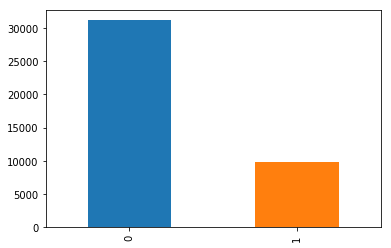

In [112]:
train['Income'].value_counts().plot.bar()

From the bar plot, we can see that around 76% of the people have income <=50K and only 24% of the people have income >50K which is what one will expect. This skewness was already expected as an assumption in the <b>Hypothesis Generation</b> section.

Now, let's visualize each variable seperately. Let's start with the categorical variables first.

# Independent Variables (Categorical)

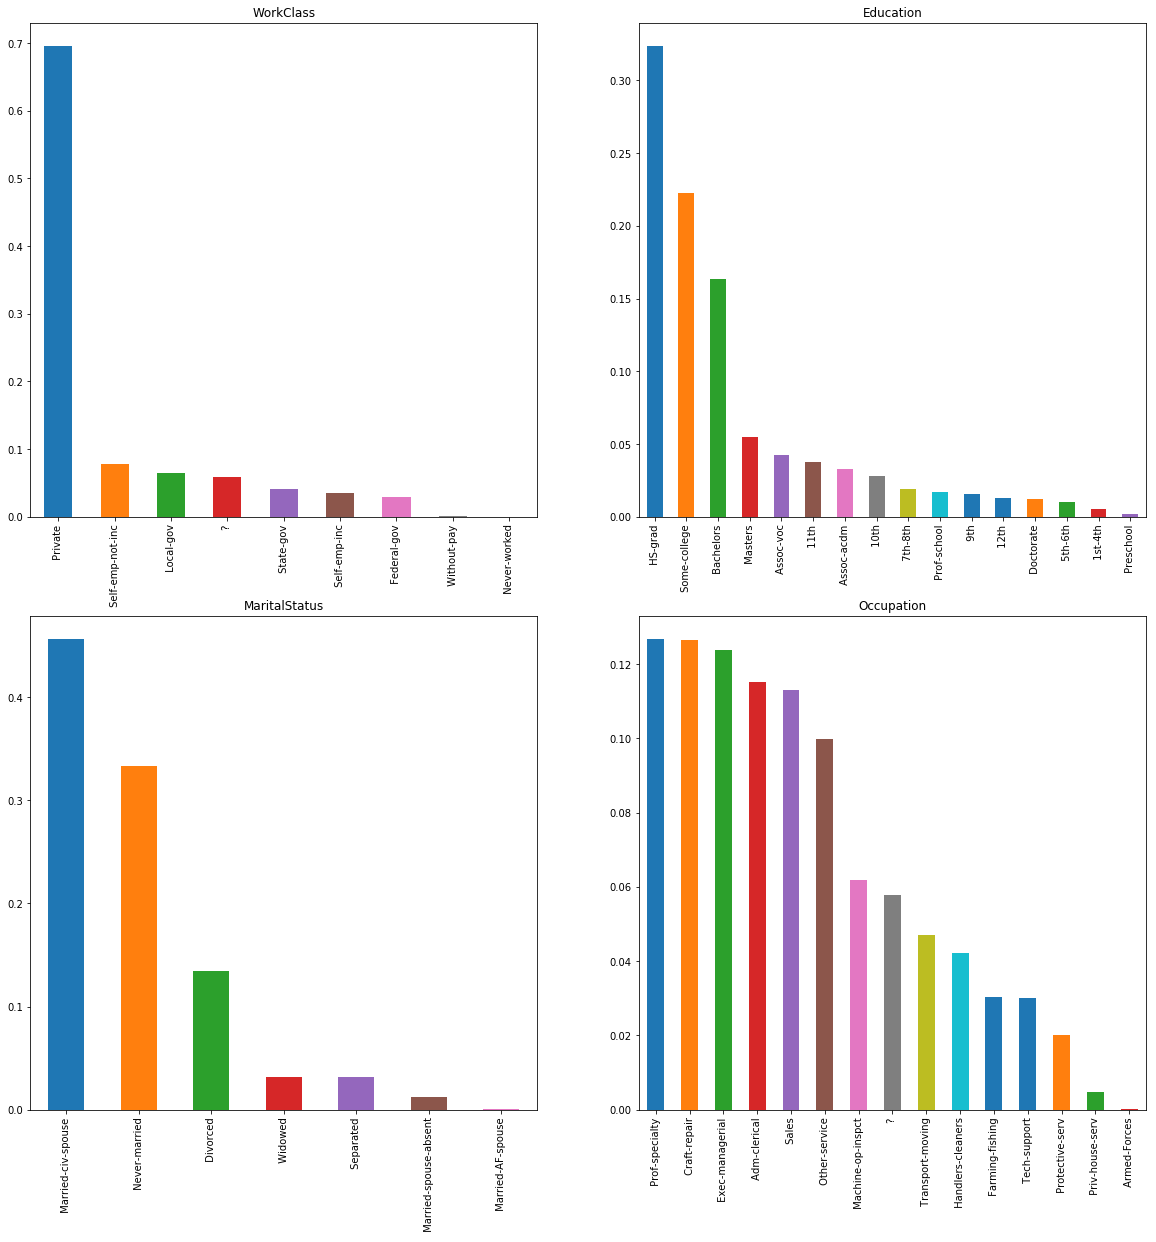

In [113]:
plt.figure(1) 

plt.subplot(221) 
train['WorkClass'].value_counts(normalize=True).plot.bar(figsize=(20,20), title = "WorkClass")

plt.subplot(222)
train['Education'].value_counts(normalize=True).plot.bar(title = "Education")

plt.subplot(223)
train['MaritalStatus'].value_counts(normalize=True).plot.bar(title = "MaritalStatus")

plt.subplot(224)
train['Occupation'].value_counts(normalize=True).plot.bar(title = "Occupation")

plt.show()

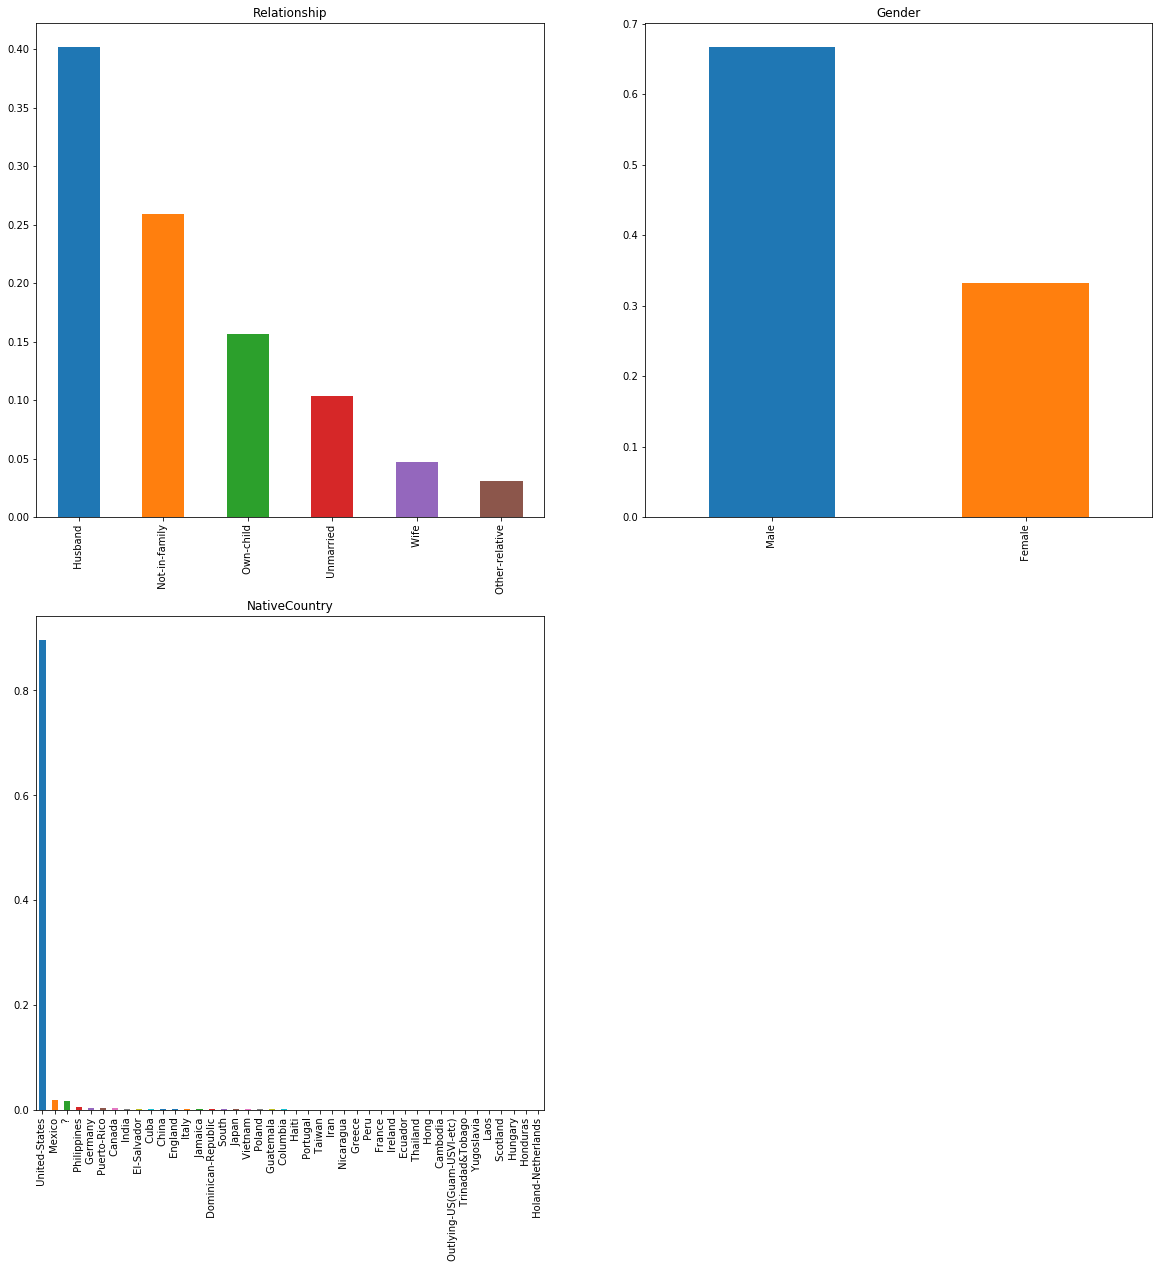

In [114]:
plt.figure(2)

plt.subplot(221)
train['Relationship'].value_counts(normalize=True).plot.bar(figsize = (20,20), title = "Relationship")

plt.subplot(222)
train['Gender'].value_counts(normalize=True).plot.bar(title = "Gender")

plt.subplot(223)
train['NativeCountry'].value_counts(normalize=True).plot.bar(title = "NativeCountry")

plt.show()

By using 'normalize=True', we can plot percentage on the Y-axis to make inferences easily.

Below information can be infered from the bar plots above:

• Around 70% people belong to private <b>WorkClass</b>.

• Majority of the people i.e. around 32% have an education atleast until <b>HS-Grad</b> while around 22% and 16% have gone to     <b>some college</b> and have a <b>bachelors</b> degree respectively.
  
• Around 46% people have a <b>MaritalStatus</b> as <b>Married-civ-spouse</b> and around 33% of the people are <b>Never-married
  </b>. A very close to 13% people are <b>Divorced</b> as well.

• The most common occupations observed are <b>Prof-specialty</b> (13%), <b>Craft-repair</b> (12.5%), <b>Exec-managerial</b> 
  (12.2%), <b>Adm-clerical</b> (11.4%), <b>Sales</b> (11.2%) and <b>Other service</b> (9.8%). 
  
• 41% are <b>husbands</b> while around 26% are <b>Not-in-family</b>.

• Around 67% are <b>Male</b> and 33% are <b>Female</b>.

• A whooping 90% people are from the <b>United States</b>.

# Independent variables (Numerical)

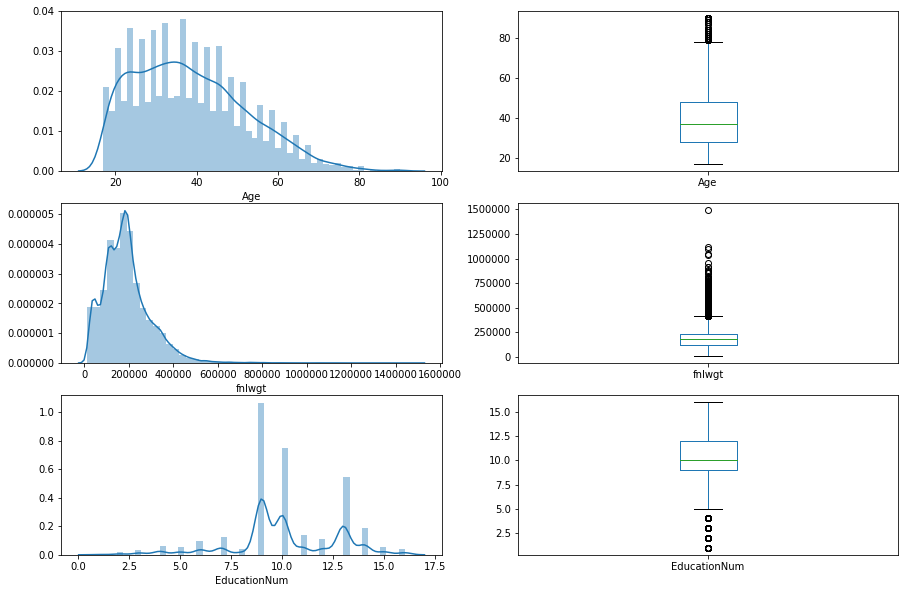

In [115]:
plt.figure(3)

plt.subplot(321)
df = train.dropna()
sns.distplot(df['Age'])

plt.subplot(322)
df['Age'].plot.box(figsize = (15,10))

plt.subplot(323)
sns.distplot(df['fnlwgt'])

plt.subplot(324)
df['fnlwgt'].plot.box()

plt.subplot(325)
sns.distplot(df['EducationNum'])

plt.subplot(326)
df['EducationNum'].plot.box()

plt.show()

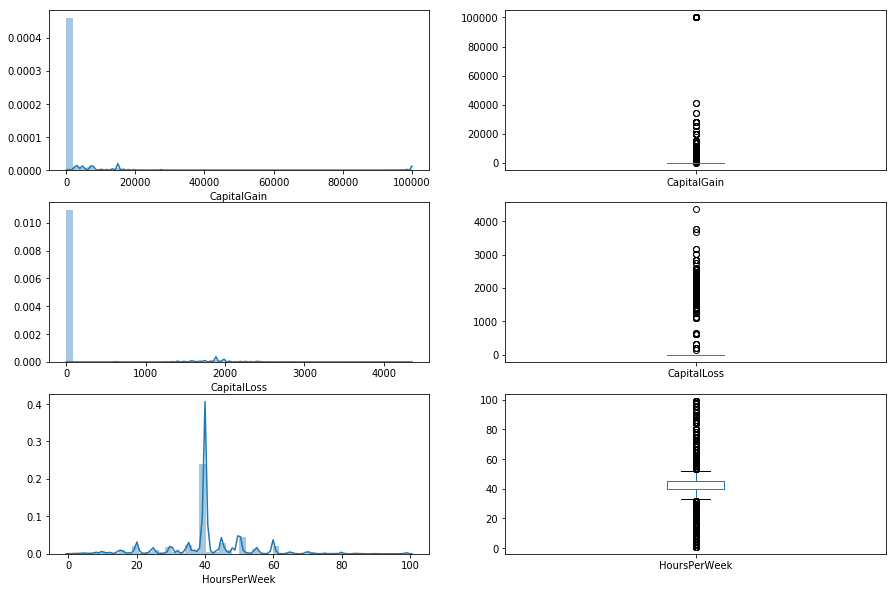

In [116]:
plt.figure(4)

plt.subplot(321)
df = train.dropna()
sns.distplot(df['CapitalGain'])

plt.subplot(322)
df['CapitalGain'].plot.box(figsize = (15,10))

plt.subplot(323)
sns.distplot(df['CapitalLoss'])

plt.subplot(324)
df['CapitalLoss'].plot.box()

plt.subplot(325)
sns.distplot(df['HoursPerWeek'])

plt.subplot(326)
df['HoursPerWeek'].plot.box()

plt.show()

Inferences from the continuous variables:

• <b>Age</b> is slightly right-skewed and the box-plot indicates the presence of outliers.

• <b>fnlwgt</b> is far from being normally distributed and is highly right-skewed. It also has outliers present.

• No specific pattern but something like a bimodal or trimodal curve can be seen from <b>EducationNum's</b> distribution plot   
  with the presence of outliers.
  
• From the distribution and box-plot of <b>CapitalGain</b> and <b>CapitalLoss</b>, most of the values are zero with some a few 
  other values indicated as outliers. 
  
• From the distribution of <b>HoursPerWeek</b>, the peak shows us that most of the people work for 40 hours per week with some 
  outliers as well.

# Bivariate Analysis

In bivariate analysis, we will try to explore the relationship between the target variable <b>Income</b> and the predictor variables. Our hypotheses will be tested in this section.

## Categorical Independent variables vs Target variable

We will take help of stacked bar plots to find out key patterns and insights. Let's begin!

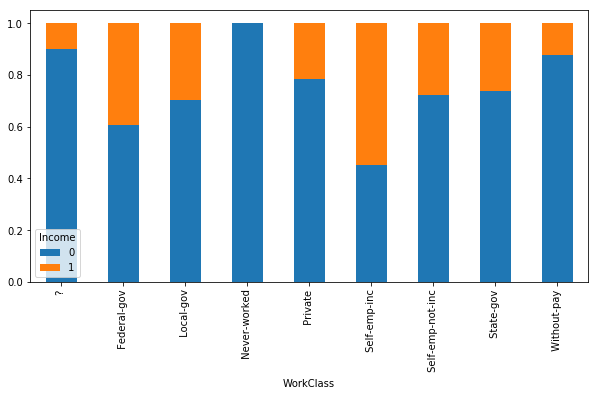

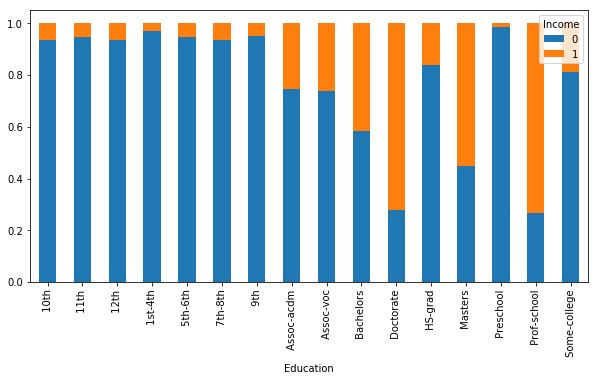

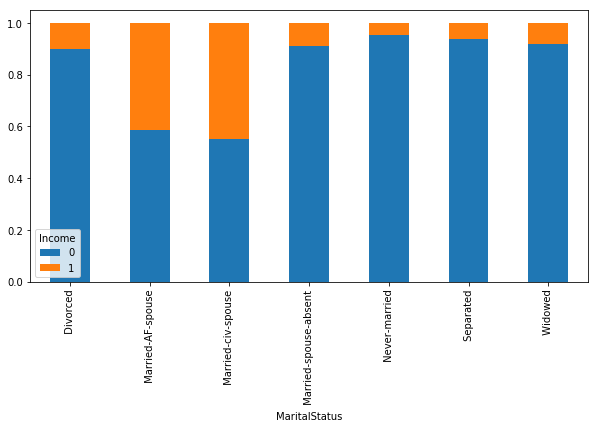

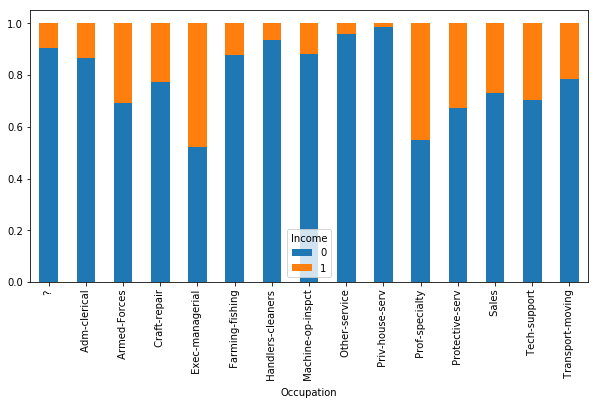

In [117]:
WorkClass = pd.crosstab(train['WorkClass'], train['Income'])
WorkClass.div(WorkClass.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.show()

Education = pd.crosstab(train['Education'], train['Income'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.show()

MaritalStatus = pd.crosstab(train['MaritalStatus'], train['Income'])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.show()

Occupation = pd.crosstab(train['Occupation'], train['Income'])
Occupation.div(Occupation.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.show()

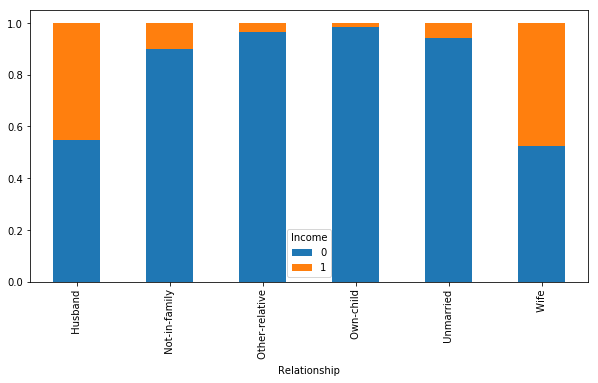

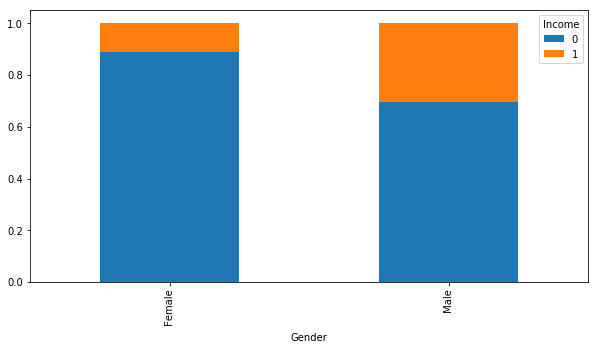

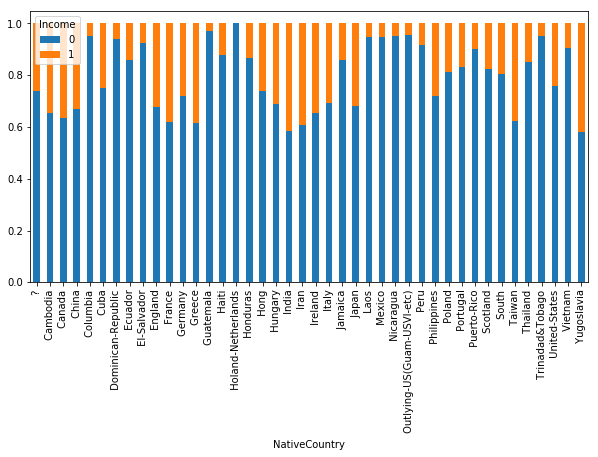

In [118]:
Relationship = pd.crosstab(train['Relationship'], train['Income'])
Relationship.div(Relationship.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.show()

Gender = pd.crosstab(train['Gender'], train['Income'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.show()

NativeCountry = pd.crosstab(train['NativeCountry'], train['Income'])
NativeCountry.div(NativeCountry.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (10,5))
plt.show()

Inferences from the relation between the categorical variables and the target variable are as follows:

• People in the <b>self-emp-inc</b> and <b>Federal-gov</b> WorkClass have income >50K. It doesn't quite match our assumption 
  made in the hypothesis generation.
  
• People having <b>Doctorate</b>, <b>Prof-school</b> and <b>Masters</b> earn higher income as compared to other categories and 
  also, it completely matches our assumption.

• <b>Married-AF-spouse</b> and <b>Married-civ-spouse</b> earn higher income as compared to other MaritalStatus.

• People having <b>Exec-managerial</b> and <b>Prof-specialty</b> as their occupation earn more which somehow matches our 
  assumption as well.
  
• <b>Husband</b> and <b>Wife</b> are likely to earn more than other categories in Relationship variable.

• <b>Male</b> tend to dominate over Female in earning an income of 50>K.

# Numerical Independent Variables vs Target Variable

Here, we already know that <b>Age</b> varible is right-skewed. So, we probably would need to normalize it. <b>fnlwgt</b> should also be transformed as it has very high standard deviation. Also, from the distribution plots of <b>CapitalGain</b>, <b>CapitalLoss</b> and <b>HoursPerWeek</b>, it is very clear that we need to normalize these features. Let's look at how <b>EducationNum</b> is related to the income.

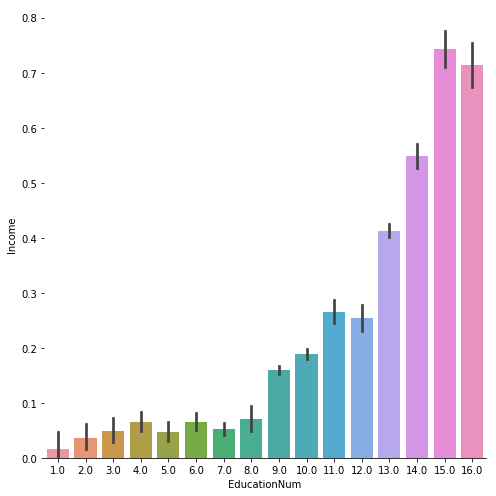

In [119]:
#EducationNum

g = sns.factorplot(x='EducationNum', y='Income', data=train, kind='bar', size=7)
g.despine(left=True)

The above plot depicts very clearly that people with higher number of educational years tend to have more income and it agrees with our hypothesis as well.

Let's address the problem of <b>Multi-Collinearity</b> also here. Let's plot a correlation matrix to check out which numerical variables are highly correlated with each other.

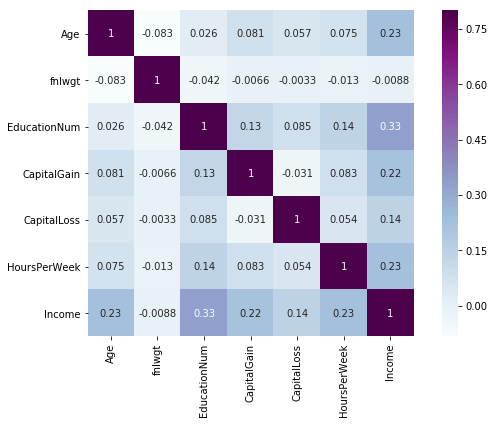

In [120]:
matrix = train.corr()
ax = plt.subplots(figsize = (10,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu", annot=True)

The color on the scale represents increase in the correlation (light to dark) as we move upwards. Hence, from the correlation matrix, it is evident that we don't have the multi-collinearity problem here as no very high correlation is directly evident from the matrix.

# Missing values and Outliers Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

## Missing Value Imputation

In [121]:
# Listing out feature-wise count of missing values

train.isnull().sum()

Age              2741
WorkClass        2789
fnlwgt           2786
Education        2743
EducationNum     2803
MaritalStatus    2924
Occupation       2759
Relationship     2815
Gender           2727
CapitalGain      2806
CapitalLoss      2718
HoursPerWeek     2680
NativeCountry    2729
Income              0
dtype: int64

So as we can see, we have missing values in almost all the variables. We have also got '?'. Those are also missing values. Let's first replace all the '?' with NaN and then we will move further.

In [122]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

In [123]:
train.isnull().sum()

Age              2741
WorkClass        5011
fnlwgt           2786
Education        2743
EducationNum     2803
MaritalStatus    2924
Occupation       4968
Relationship     2815
Gender           2727
CapitalGain      2806
CapitalLoss      2718
HoursPerWeek     2680
NativeCountry    3396
Income              0
dtype: int64

As we can observe, there were '?' in the WorkClass, Occupation and NativeCountry which has now been replaced by NaN. Now, we will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

    • For numerical variables: imputation using mean or median
    
    • For categorical variables: imputation using mode

### Categorical Variables

In [124]:
# WorkClass

print(train['WorkClass'].value_counts()) 
print(test['WorkClass'].value_counts())

 Private             26529
 Self-emp-not-inc     2962
 Local-gov            2443
 State-gov            1544
 Self-emp-inc         1314
 Federal-gov          1107
 Without-pay            16
 Never-worked            9
Name: WorkClass, dtype: int64
 Private             3152
 Self-emp-not-inc     381
 Local-gov            286
 State-gov            201
 Self-emp-inc         168
 Federal-gov          139
Name: WorkClass, dtype: int64


Here, we can see that maxiumum amount values lie in the 'Private' WorkClass. So, we will try to replace all the missing values with the Mode i.e. the 'Private' WorkClass.

In [125]:
train['WorkClass'].fillna(train['WorkClass'].mode()[0], inplace=True)
test['WorkClass'].fillna(test['WorkClass'].mode()[0], inplace=True)

In [126]:
# Education

train['Education'].fillna(train['Education'].mode()[0], inplace=True)
test['Education'].fillna(test['Education'].mode()[0], inplace=True)

In [127]:
# MaritalStatus

train['MaritalStatus'].fillna(train['MaritalStatus'].mode()[0], inplace=True)
test['MaritalStatus'].fillna(test['MaritalStatus'].mode()[0], inplace=True)

# Occupation

train['Occupation'].fillna(train['Occupation'].mode()[0], inplace=True)
test['Occupation'].fillna(test['Occupation'].mode()[0], inplace=True)

# Relationship

train['Relationship'].fillna(train['Relationship'].mode()[0], inplace=True)
test['Relationship'].fillna(test['Relationship'].mode()[0], inplace=True)

# Gender

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

# NativeCountry

train['NativeCountry'].fillna(train['NativeCountry'].mode()[0], inplace=True)
test['NativeCountry'].fillna(test['NativeCountry'].mode()[0], inplace=True)



Now that we have replaced all the categorical variables with mode value of the respective variable, we can expect 0 missing values for all the categorical variables. Let's check it!

In [128]:
train.isnull().sum()

Age              2741
WorkClass           0
fnlwgt           2786
Education           0
EducationNum     2803
MaritalStatus       0
Occupation          0
Relationship        0
Gender              0
CapitalGain      2806
CapitalLoss      2718
HoursPerWeek     2680
NativeCountry       0
Income              0
dtype: int64

Great! Let's move on to the numerical variables now.

### Numerical variables

From the boxplots above, we detected that there were outliers present mainly in the 'Age' and 'fnlwgt' variables. And outliers often have a significant effect on the overall distribution. Hence, we must take steps to remove them from our datasets. Due to the presence of outliers, the data develops skewness which basically means that the data tries to deviate more from the normal distribution. In our case, right-skewness can be seen in both 'Age' as well as 'fnlwgt' variable. One way to remove skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution. We can see the effect of log transformation below as compared to the distribution plots created earlier.

In [129]:
# Age

train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)


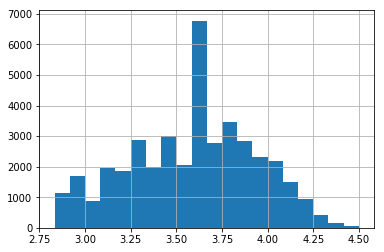

In [130]:
# Dealing with the outliers in Age

train['Age_log'] = np.log(train['Age'])
train['Age_log'].hist(bins=20)


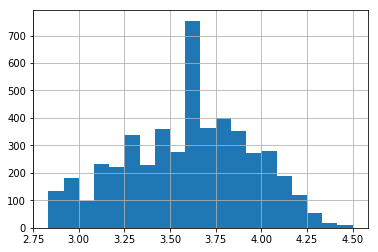

In [131]:
# Doing the same thing for the test dataset as well

test['Age_log'] = np.log(test['Age'])
test['Age_log'].hist(bins=20)

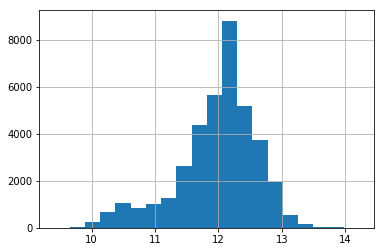

In [132]:
# fnlwgt

# Dealing with the outliers first

train['fnlwgt_log'] = np.log(train['fnlwgt'])
train['fnlwgt_log'].hist(bins=20)

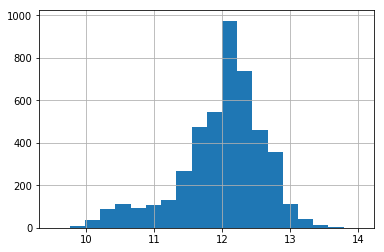

In [133]:
# Doing the same thing for the test dataset as well

test['fnlwgt_log'] = np.log(test['fnlwgt'])
test['fnlwgt_log'].hist(bins=20)

In [134]:
# Inputting the missing values for fnlwgt

train['fnlwgt_log'].fillna(train['fnlwgt_log'].mean(), inplace=True)
test['fnlwgt_log'].fillna(test['fnlwgt_log'].mean(), inplace=True)

Now, as we have already created a new log-transformed column for both Age and fnlwgt, we don't need all the columns. Let's just drop Age and fnlwgt column without log transformation. 

In [135]:
train = train.drop(['Age','fnlwgt'], axis=1)
test = test.drop(['Age','fnlwgt'], axis=1)

Let's replace all the missing values with mean for EducationNum and HoursPerWeek.

In [136]:
# EducationNum

train['EducationNum'].fillna(train['EducationNum'].mean(), inplace=True)
test['EducationNum'].fillna(test['EducationNum'].mean(), inplace=True)

# HoursPerWeek

train['HoursPerWeek'].fillna(train['HoursPerWeek'].mean(), inplace=True)
test['HoursPerWeek'].fillna(test['HoursPerWeek'].mean(), inplace=True)

For CapitalGain and CapitalLoss, we can see that most of the observations are 0 both in the train and in the test data. So, let's replace all the missing values with 0 for both CapitalGain and CapitalLoss.

In [137]:
# CapitalGain

train['CapitalGain'].fillna(0, inplace=True)
test['CapitalGain'].fillna(0, inplace=True)

# CapitalLoss

train['CapitalLoss'].fillna(0, inplace=True)
test['CapitalLoss'].fillna(0, inplace=True)

Now that we have replaced all the missing values, let's make a final check for certainity.

In [138]:
train.isnull().sum(), test.isnull().sum() 

(WorkClass        0
 Education        0
 EducationNum     0
 MaritalStatus    0
 Occupation       0
 Relationship     0
 Gender           0
 CapitalGain      0
 CapitalLoss      0
 HoursPerWeek     0
 NativeCountry    0
 Income           0
 Age_log          0
 fnlwgt_log       0
 dtype: int64, WorkClass        0
 Education        0
 EducationNum     0
 MaritalStatus    0
 Occupation       0
 Relationship     0
 Gender           0
 CapitalGain      0
 CapitalLoss      0
 HoursPerWeek     0
 NativeCountry    0
 Age_log          0
 fnlwgt_log       0
 dtype: int64)

Great! We have already dealt with the missing values and the outliers.

# Feature Engineering

Now that we have no missing values, let's try to some creative feature engineering that might help increase in our model's performance.

For the target variable <b>Income</b>, we have already changed it to 0's and 1's.

For <b>WorkClass</b>, Never-worked and Without-pay are not present in the test data as a category. There are just 25 total observations for both. So, let's just merge them to 'Private' category.

In [139]:
train['WorkClass'].replace(' Without-pay', ' Private', inplace=True)
train['WorkClass'].replace(' Never-worked', ' Private', inplace=True)

For the <b>Occupation</b> variable, we don't have 'Armed-Forces' in the test dataset as a category. It wouldn't matter much if we add 'Armed-Forces' to any category because there are not so many values for it. But let's add 'Armed-Forces' in the training dataset to the 'Other-service'. 

In [140]:
train['Occupation'].replace(' Armed-Forces', ' Other-service', inplace=True)

Let's look at the <b>Education</b> variable now. We could think of combining a few categories together as that would make more sense. For example, if we look at the bar plot of the education in the Exploratory data analysis of categorical variables, we can see that we can combine 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th and 12th into one category called 'Pri_Sec' which means Primary-Secondary education. Let's try to define a function that would do it for us. Let's do it!

In [141]:
def Pri_Sec(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Pri_Sec'
    else:
        return x

In [142]:
train['Education'] = train['Education'].apply(Pri_Sec)
test['Education'] = test['Education'].apply(Pri_Sec)

Let's also combine Assoc-voc and Assoc-acdm as it seems like they both belong to a same category.

In [143]:
def Assoc_voc_acdm (x):
    if x in [' Assoc-voc', ' Assoc-acdm']:
        return 'Assoc_voc_acdm'
    else:
        return x

In [144]:
train['Education'] = train['Education'].apply(Assoc_voc_acdm)
test['Education'] = test['Education'].apply(Assoc_voc_acdm)

Let's move on to the <b>MaritalStatus</b> variable now. From the plot, we can merge Married-AF-spouse and Married-civ-spouse as they belong to the same category. Also, we can combine divorced and seperated as they convey the same meaning.

In [145]:
train['MaritalStatus'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['MaritalStatus'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

train['MaritalStatus'].replace(' Separated', ' Divorced', inplace=True)
test['MaritalStatus'].replace(' Separated', ' Divorced', inplace=True)

Let's look at the last variable i.e. <b>NativeCountry</b> here. It contains a list of countries. Let's try to somehow divide them into just a few categories such as United States, Asia, Other_Western and Islands.

In [146]:
def region(country):
    if country in [' United-States']:
        return 'US'
    elif country in [' Puerto-Rico', ' Dominican-Republic', ' South', ' Outlying-US(Guam-USVI-etc)']:
        return 'Others'
    elif country in [' Mexico', ' Philippines', ' India', ' China', ' England', ' Japan', ' Vietnam', ' Taiwan', ' Iran', ' Thailand', ' Hong', ' Cambodia', ' Yugoslavia', ' Laos']:
        return 'Asia'
    elif country in [' Germany', ' Canada', ' El-Salvador', ' Cuba', ' Italy', ' Jamaica', ' Poland', ' Guatemala', ' Columbia', ' Haiti', ' Portugal', ' Nicaragua', ' Greece', ' Peru', ' France', ' Ireland', ' Ecuador', ' Trinadad&Tobago', ' Hungary', ' Scotland', ' Honduras', ' Holand-Netherlands']:
        return 'Western'
    else:
        return country

In [147]:
train['NativeCountry'] = train['NativeCountry'].apply(region)
test['NativeCountry'] = test['NativeCountry'].apply(region)

Let's perform z-score normalization for <b>CapitalGain</b> as well as <b>CapitalLoss</b>.

In [148]:
train['CapitalGain']=(train['CapitalGain'] - train['CapitalGain'].mean()) / train['CapitalGain'].std()
test['CapitalGain']=(test['CapitalGain'] - test['CapitalGain'].mean()) / test['CapitalGain'].std()

train['CapitalLoss']=(train['CapitalLoss'] - train['CapitalLoss'].mean()) / train['CapitalLoss'].std()
test['CapitalLoss']=(test['CapitalLoss'] - test['CapitalLoss'].mean()) / test['CapitalLoss'].std()

This completes our feature engineering on the train and the test dataset.

# Evaluation metric for this Classification problem:

The evaluation metric that we will be using for this Classification problem is going to be <b>f1-score</b> as it is a case of imbalanced data and using Accuracy directly as an evaluation metric wouldn't be such a good idea as the model would mostly try to predict the majority samples in the dataset.

F1-score can basically defined from the Confusion Matrix as:

Accuracy = (2 x Precision x Recall) / (Precision + Recall)

where,

Precision = TP / (TP+FP)

Recall = TP / (TP+FN)

TP (True Positive) = Targets which are actually true (Y) and we have predicted them as true (Y)

TN (True Negative) = Targets which are actually false (N) and we have predicted them as false (N)

FP (False Positive) = Targets which are actually false (N) and we have predicted them as true (Y)

FN (False Negative) = Targets which are actually true (Y) and we have predicted them as false (N)

Various other performance evaluation metrics like Precision, Recall, F1-score and ROC curve can also be used to check how well a model is performing.

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [149]:
X = train.drop('Income', axis=1)
y = train.Income

## One-hot encoding

As we already know, all of our categorical variables have text values but some algorithms like Logistic regression understand only numbers. So, there has to be a way to somehow convert these text to numbers without losing the meaning. <b>One-hot encoding</b> is a way to do that. It basically turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. For example:

• One of the categorical variables in our dataset is <b>Gender</b> i.e. Male and Female.

• Once we apply one-hot encoding, Gender_Male will have a value of 0 if the gender is female and a value of 1 if the gender is
  Male.

• It will automatically create two different columns: Gender_Male and Gender_Female. Similar will be the case for all the
  categorical variables.

In [150]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

Now, we will train the modelon <b>train</b> dataset and make predictions for the test dataset. But before that, let's try to validate if what we are doing is good or not. One way of doing this is we can divide our train data into two parts: Train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way, we can have the true predictions for the validation part.

I'm gonna be trying 3 different models and see which one works best on the validation data. The three models are:

    • Logistic Regression
    
    • Random Forest
    
    • XGBoost

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

Here, as the data is imbalanced, we will first try to make the data balanced by using an oversampling technique called SMOTE (Synthetic Minority Oversampling Technique). 

In [151]:
# SMOTE

from imblearn.over_sampling import SMOTE

In [152]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_train, x_cv, y_train, y_cv = train_test_split(X_resampled,y_resampled, test_size =0.3, random_state = 12)

## Logistic Regression

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [155]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score

In [70]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Information about the parameters above:

C - inverse of regularization strength. Smaller values specify higher regularization

class_weight - weights associated with classes in the variable

dual = False applies when no. of samples are greater than no. of features

fit_intercept = True means do add the constant value in the function

max_iter = Max. number of iterations required to converge

multi_class = two possible options 'ovr' for binary outcome and 'multinomial' for multiclass

n_jobs = Number of CPU cores used when parallelizing over classes

penalty = 'l2' . Other options are l1, elastic net or None

random_state = similar like seed

solver = liblinear can be applied to one vs rest schemes as well. Other solvers are lbfgs, sag, saga

Tol = Tolerance for stopping criteria

verbose = details for each and every step that the system does

warm_start = True reuse the solution of the previous call

Here, the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

Let’s predict the <b>Income</b> for validation set and calculate its accuracy.

In [71]:
pred_cv = model.predict(x_cv)

In [73]:
f1_score(y_cv,pred_cv)

0.8281915446141062

So, our predictions have an F1-score of almost 83% i.e. we have successfully identified 85% of the Income correctly.

## Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
model = RandomForestClassifier(random_state=1, max_depth=12)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Information about all the parameters above:

bootstrap = True means bootstrap samples are used when building trees. If false, whole dataset is used to build each tree

class_weight = weights associated with classes

criterion = 'gini' for Gini impurity and 'entropy' for Information gain. This is a function to measure the quality of split

max_depth = how complex the tree is

max_features =  max number of features

min_samples_leaf = min. num of samples required to be at leaf node

min_samples_split = min samples required to split an internal node

n_estimators = Number of trees in the forest

n_jobs = no of cores used for parallel processing

oob_score = Score of training dataset using out-of-bag estimate

In [164]:
pred_cv = model.predict(x_cv)

In [165]:
f1_score(y_cv,pred_cv)

0.8607977437550363

So, <b>Random Forest</b> gives us the F1-score of 86% which is higher thah Logistic Regression. This F1-score was obtained without parameter tuning.

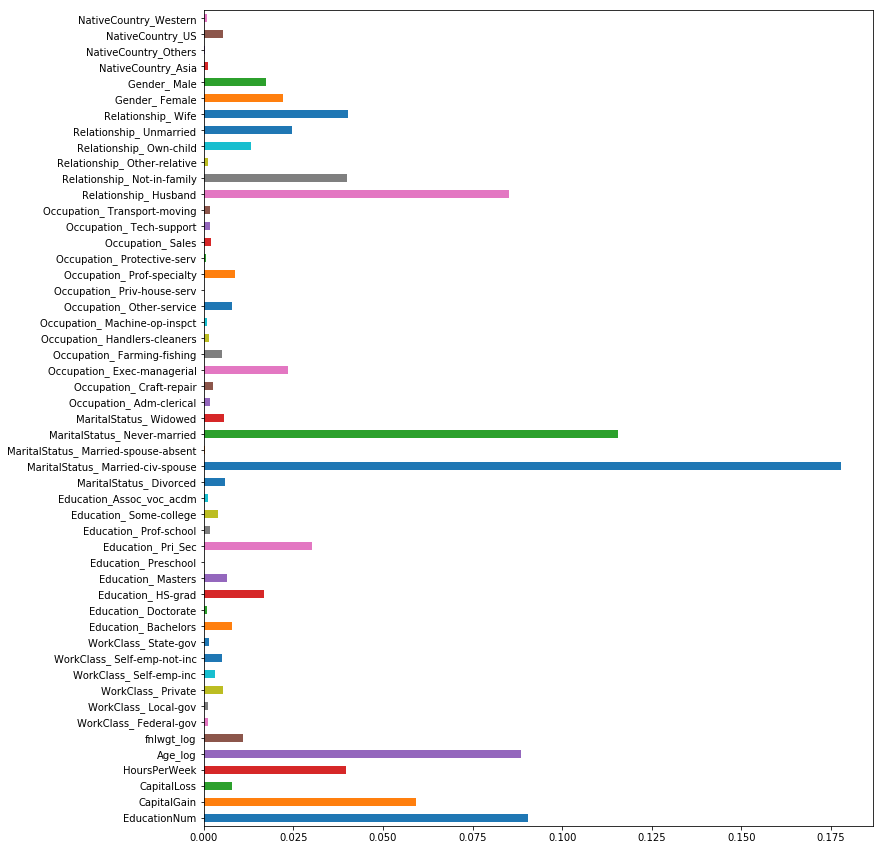

In [166]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,15))

Here, the feature importance plot gives us clear idea about what predictor variables contribute the most in boosting the model performance. Important features are: <b>MaritalStatus_Married-civ-spouse</b>, <b>capitalGain</b>, <b>EducationNum</b>, <b>Age_log</b>, <b>Relationship_Husband</b> etc. 

# XGBoost

The xgboost library here has been downloaded by writing 'pip install xgboost' in the Ananconda prompt.

In [156]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [190]:
model_final = XGBClassifier(n_estimators=150, max_depth=5, min_child_weight=3, gamma=0, colsample_bytree=0.8, subsample=0.8, learning_rate=0.05, random_state=1) 
model_final.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

Information about the parameter above:

base_score = Inital prediction scores of all instances. Prior probability of the event of interest in the dataset

booster = other options are gblinear and dart

colsample_bylevel, colsample_bynode, colsample_bytree = they are the subsample ratio of columns for each level, for each node(split) and for constructing each tree.

gamma = Min loss reduction required to make a further partition on a leaf node of the tree. The larger the gamma is, the more conservative the algorithm will be

learning rate = step size shrinkage

max_delta_step = higher the value, it will make the update step more conservative

max_depth = Increasing the value will make model more complex

min_child_weight = min sum of weight needed in a child

n_estimators = no of trees or rounds

n_jobs = no. of CPU cores for parallel processing

n_thread = number of parallel threads

objective = other options are multi:softmax for multiclass, reg:squarederror, reg:squaredlogerror

reg_alpha = L1 regularization

reg_lambda = L2 regularization

Subsample = ratio of training instances. Setting it to 0.5 means XGBoost would randomly sample half of the training data prior to growing trees.

In [191]:
pred_cv = model_final.predict(x_cv)

In [192]:
f1_score(y_cv,pred_cv)

0.8745671610935964

Even by randomly tweaking some of the parameters of XGBoost like <b>n_estimators</b>, <b>max_depth</b>, <b>min_child_weight</b>, <b>gamma</b> and <b> learning_rate</b>, F1-score of around 87.4% was obtained which is the highest amongst all the 3 models.

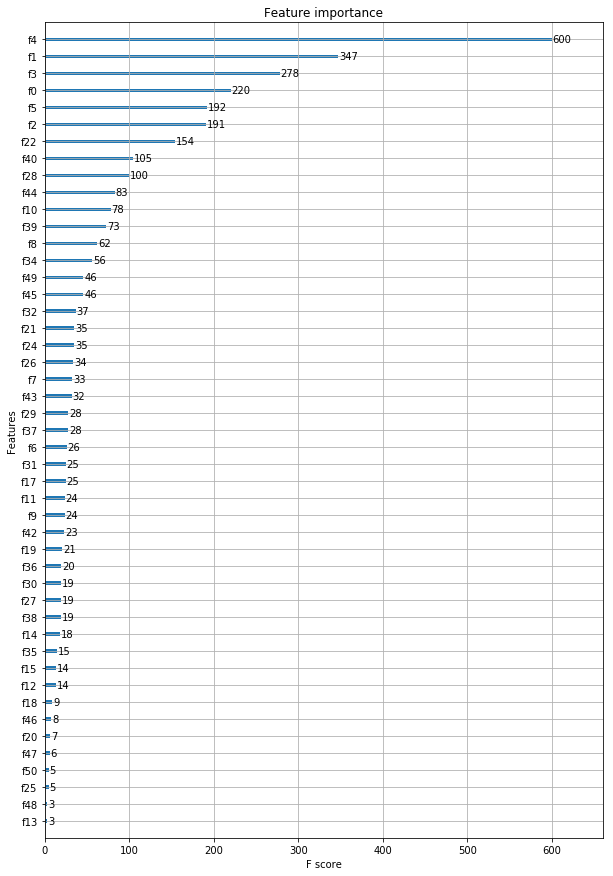

In [193]:
plot_importance(model_final)
plt.rcParams['figure.figsize'] = (10,15)
plt.show()

The important features indicated are very similar to those in feature importance of Random Forest with the addition of <b>fnlwgt_log</b>, <b>HoursPerWeek</b> and <b>CapitalLoss</b>.

Now that we are going to using XgBoost as our final model, let's try to tune the paramters to achieve the optimum F1-score.

In [169]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [168]:
# Parameter tuning

dtrain = xgb.DMatrix(X_resampled,label=y_resampled)
dvalid = xgb.DMatrix(x_cv, label=y_cv)
dtest = xgb.DMatrix(test)

In [194]:
# Parameters that we are going to tune

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1, n_estimators=150, max_depth=5,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='f1', cv=5)
gsearch1.fit(X_resampled, y_resampled)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=3,
                                     missing=None, n_estimators=150, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True

In [195]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 3}, 0.877651901515863)

In [173]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1, n_estimators=150, max_depth=7,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', scale_pos_weight=1, seed=27),
 param_grid = param_test2, scoring='f1', cv=5)
gsearch2.fit(X_resampled, y_resampled)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=7, min_child_weight=3,
                                     missing=None, n_estimators=150, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', 

In [174]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.877651901515863)

In [175]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1, n_estimators=150, max_depth=7,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', scale_pos_weight=1, seed=27),
 param_grid = param_test3, scoring='f1', cv=5)
gsearch3.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=7, min_child_weight=3,
                                     missing=None, n_estimators=150, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs',

In [176]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.8}, 0.8781417165379539)

In [ ]:
model_final1 = XGBClassifier(n_estimators=150, max_depth=7, min_child_weight=3, gamma=0, colsample_bytree=0.6, subsample=0.8, learning_rate=0.1, random_state=1) 
model_final1.fit(x_train, y_train)

Let's use XGBoost model to predict the test dataset as it has the highest validation accuracy.

Now, let's make predictions for the test dataset. One thing to remember here is we need predictions in <=50K and >50K. Let's convert 1 and 0 to >50K and <=50K respectively. 

In [108]:
pred_test = model_final1.predict(test)

C:\Users\Kush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Producing the submission file now.

In [109]:
Submission = pd.DataFrame({'Income': pred_test})

In [110]:
Submission['Income'].replace(0, '<=50K', inplace=True)
Submission['Income'].replace(1, '>50K', inplace=True)

In [111]:
Submission.to_csv('Predictions.csv')

Here, I have just included the predictions with index but without any other columns. Index can easily be removed by just entering index=False in the above piece of code. 